In [4]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import math
import csv
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
whiskey = pd.read_csv(StringIO(s))

In [6]:
whiskey.head()

Name  Rating  Country Category  Price  \
0        Canadian Hunter Canadian Whisky    40.0   Canada  Blended    9.0   
1  Canadian LTD Blended Canadian Whiskey    43.0   Canada  Blended   10.0   
2                   Kellan Irish Whiskey    47.0  Ireland  Blended   20.0   
3            Rich & Rare Canadian Whisky    47.0   Canada  Blended   10.0   
4  Canadian Mist Blended Canadian Whisky    48.0   Canada  Blended   12.0   

    ABV  Age            Brand  
0  40.0  NaN  Canadian Hunter  
1   NaN  NaN     Canadian LTD  
2  40.0  NaN           Kellan  
3   NaN  NaN      Rich & Rare  
4  40.0  NaN    Canadian Mist

In [7]:
#Show number of record (rows,columns)
whiskey.shape

(283, 8)

In [8]:
#Show data type of each arttibute
whiskey.dtypes

Name         object
Rating      float64
Country      object
Category     object
Price       float64
ABV         float64
Age         float64
Brand        object
dtype: object

In [9]:
#Describe basic statistic for each numeric attribute
for x in ('Rating','Price','ABV','Age'):
    print(whiskey[x].describe())
    print('\n')

count    272.000000
mean      84.474265
std       11.877887
min       40.000000
25%       80.000000
50%       88.000000
75%       94.000000
max      100.000000
Name: Rating, dtype: float64


count    279.000000
mean      72.483871
std       83.992242
min        2.000000
25%       30.000000
50%       50.000000
75%       80.000000
max      850.000000
Name: Price, dtype: float64


count    270.000000
mean      44.610444
std        5.883056
min       35.500000
25%       40.000000
50%       43.000000
75%       46.000000
max       68.200000
Name: ABV, dtype: float64


count    174.000000
mean      14.339080
std        6.322267
min        0.000000
25%       10.000000
50%       14.500000
75%       18.000000
max       40.000000
Name: Age, dtype: float64




In [10]:
#Describe basic statistic for each norminal attribute
for x in ['Name','Country','Category','Brand']:
    print(whiskey[x].describe())
    print('\n')

count                                              283
unique                                             283
top       Kavalan Solist Ex-Bourbon Single Malt Whisky
freq                                                 1
Name: Name, dtype: object


count          283
unique           9
top       Scotland
freq           108
Name: Country, dtype: object


count         283
unique         15
top       Blended
freq           73
Name: Category, dtype: object


count          283
unique         153
top       Balvenie
freq             7
Name: Brand, dtype: object




In [11]:
#Show missing values of each attribute
whiskey.isnull().sum()

Name          0
Rating       11
Country       0
Category      0
Price         4
ABV          13
Age         109
Brand         0
dtype: int64

In [12]:
#convert nominal data to numeric data
lb_encoder = LabelEncoder()
whiskey['Country'] = lb_encoder.fit_transform(whiskey['Country'])
whiskey['Category'] = lb_encoder.fit_transform(whiskey['Category'])
whiskey['Brand'] = lb_encoder.fit_transform(whiskey['Brand'])

In [13]:
#create numpy array from DataFrame
x = whiskey.values

In [14]:
#Remove attribute Name because it is identifier attribute
x = x[:,1:]

In [15]:
#Look around the rating attribute
x[:,0]

array([40.0, 43.0, 47.0, 47.0, 48.0, 50.0, 53.0, 54.0, 54.0, 54.0, 56.0,
       56.0, 57.0, 57.0, 58.0, 60.0, 60.0, 64.0, 64.0, 65.0, 65.0, 67.0,
       67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0,
       70.0, 70.0, 71.0, 71.0, 72.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0,
       75.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 77.0, 77.0, 77.0, 77.0,
       77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 79.0, 79.0, 80.0, 80.0,
       80.0, 80.0, 80.0, 80.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
       81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
       82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 83.0, 83.0, 83.0,
       83.0, 83.0, 83.0, 83.0, 83.0, 84.0, 84.0, 84.0, 84.0, 84.0, 84.0,
       85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 86.0, 86.0,
       86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0,
       87.0, 87.0, 87.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0,
       88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88

In [16]:
#Find median of each numeric attribute
med_rating = np.median([xx for xx in x[:,0] if not math.isnan(xx)])
med_price = np.median([xx for xx in x[:,3] if not math.isnan(xx)])
med_avb = np.median([xx for xx in x[:,4] if not math.isnan(xx)])
med_age = np.median([xx for xx in x[:,5] if not math.isnan(xx)])

In [50]:
#Create new numpy array that replace the missing values with median (only numeric attributes)
rating = np.array([med_rating if math.isnan(xx) else xx for xx in x[:,0]]).reshape(-1,1)
price = np.array([med_price if math.isnan(xx) else xx for xx in x[:,3]]).reshape(-1,1)
avb = np.array([med_avb if math.isnan(xx) else xx for xx in x[:,4]]).reshape(-1,1)
age = np.array([med_age if math.isnan(xx) else xx for xx in x[:,5]]).reshape(-1,1)
num_att = np.concatenate((rating, price, avb, age), axis=1)

array([[0.        , 0.16666667, 0.        , 0.59090909],
       [0.        , 0.09090909, 0.        , 0.59090909],
       [0.02777778, 0.12121212, 0.        , 0.59090909],
       [0.02777778, 0.12878788, 0.        , 0.59090909],
       [0.08333333, 0.31818182, 0.20408163, 0.63636364],
       [0.08333333, 0.39393939, 0.        , 0.59090909],
       [0.08333333, 0.43181818, 0.        , 0.90909091],
       [0.08333333, 0.04545455, 0.        , 0.        ],
       [0.11111111, 0.12878788, 0.        , 0.59090909],
       [0.11111111, 0.03030303, 0.        , 0.59090909],
       [0.13888889, 0.11363636, 0.        , 0.59090909],
       [0.13888889, 0.11363636, 0.        , 0.36363636],
       [0.13888889, 0.09090909, 0.        , 0.59090909],
       [0.16666667, 0.28030303, 0.20408163, 0.36363636],
       [0.16666667, 0.13636364, 0.        , 0.59090909],
       [0.19444444, 0.14393939, 0.        , 0.        ],
       [0.19444444, 0.31818182, 0.20408163, 0.        ],
       [0.25      , 0.57575758,

In [18]:
#Define function that return lower and upper outlier of data.
def outlier(x):
    rating_q1 = np.percentile(x,25)
    rating_q3 = np.percentile(x,75)
    IQR = rating_q3 - rating_q1
    lower_outlier = rating_q1 - (1.5*IQR)
    higher_outlier = rating_q3 + (1.5*IQR)
    return (lower_outlier, higher_outlier)

In [19]:
#Define the function that return parameter without outlier
def del_outlier(x):
    l, h = outlier(x)
    return [i for i,xx in enumerate(x) if xx >= l and xx <= h]

def idx_outlier(x):
    l, h = zip(*[outlier(x[:,i]) for i in range(x.shape[1])])
    idx = [j for i in range(x.shape[1]) for j in range(x.shape[0]) if x[j,i] > h[i] or x[j,i] < l[i]]
    return list(set(idx))

In [20]:
#Create index of outlier in each attribute
rating_idx = del_outlier(rating)
price_idx = del_outlier(price)
avb_idx = del_outlier(avb)
age_idx = del_outlier(age)

In [21]:
#index of outlier from all numeric attribute
idx = idx_outlier(num_att)
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 21, 30, 31, 37, 45, 46, 54, 59, 67, 68, 75, 80, 81, 87, 88, 94, 98, 106, 109, 114, 129, 135, 136, 137, 142, 143, 144, 150, 152, 154, 155, 166, 167, 168, 170, 171, 172, 174, 184, 186, 187, 188, 199, 205, 206, 207, 208, 209, 211, 214, 217, 220, 222, 225, 226, 228, 232, 239, 241, 244, 249, 266, 268, 269, 271, 274, 275, 276, 280, 282]


In [22]:
#delete all outlier rows
num_atts = np.delete(num_att, idx, axis=0)
num_atts.shape

(196, 4)

In [23]:
print(num_atts) # [Rating,Price,ABV,Age]

[[ 64.    30.    40.    14.5 ]
 [ 64.    20.    40.    14.5 ]
 [ 65.    24.    40.    14.5 ]
 [ 65.    25.    40.    14.5 ]
 [ 67.    50.    43.    15.  ]
 [ 67.    60.    40.    14.5 ]
 [ 67.    65.    40.    18.  ]
 [ 67.    14.    40.     8.  ]
 [ 68.    25.    40.    14.5 ]
 [ 68.    12.    40.    14.5 ]
 [ 69.    23.    40.    14.5 ]
 [ 69.    23.    40.    12.  ]
 [ 69.    20.    40.    14.5 ]
 [ 70.    45.    43.    12.  ]
 [ 70.    26.    40.    14.5 ]
 [ 71.    27.    40.     8.  ]
 [ 71.    50.    43.     8.  ]
 [ 73.    84.    40.    18.  ]
 [ 73.    90.    40.    12.  ]
 [ 74.    90.    46.    14.5 ]
 [ 74.    40.    40.    10.  ]
 [ 74.    50.    45.    14.5 ]
 [ 74.    58.    40.    19.  ]
 [ 75.    85.    43.    10.  ]
 [ 76.    36.    46.    14.5 ]
 [ 76.    70.    46.    14.5 ]
 [ 76.    16.    40.    14.5 ]
 [ 76.    45.    40.    15.  ]
 [ 77.    50.    43.    15.  ]
 [ 77.    28.    40.    12.  ]
 [ 77.    70.    46.    14.5 ]
 [ 77.    20.    50.     8.  ]
 [ 78.  

In [24]:
print(num_atts[189][0])

100.0


In [26]:
myFile = open('Whiskey.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(['Rating','Price','ABV','Age'])
    writer.writerows(num_atts)

In [27]:
x = np.delete(x, idx, axis=0)

In [28]:
x[:,0] = num_atts[:,0]
x[:,3:6] = num_atts[:,1:]

In [49]:
#normalize data
x = MinMaxScaler().fit_transform(x)

[[0.         0.         0.         0.16666667 0.         0.59090909]
 [0.         0.5        0.         0.09090909 0.         0.59090909]
 [0.02777778 0.5        0.         0.12121212 0.         0.59090909]
 ...
 [0.66666667 0.75       0.46153846 0.31818182 0.20408163 0.18181818]
 [0.66666667 0.75       0.         0.16666667 0.40816327 0.36363636]
 [0.66666667 1.         0.07692308 0.24242424 0.34013605 0.90909091]]


In [30]:
df = pd.DataFrame(x)

In [31]:
cor = df.corr()

In [32]:
#correlation with Brand(col 6) close to 0 (didnt co-relate with rating), so we drop column 6
print(cor.iloc[0])
x = np.delete(x, 6, axis=1)

0    1.000000
1    0.411621
2    0.257011
3    0.307365
4    0.300272
5    0.103229
6    0.034191
Name: 0, dtype: float64


In [48]:
#call dataframe for histogram (fr)
whiskeydf =pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv")

Name  Rating   Country  \
0                      Canadian Hunter Canadian Whisky    40.0    Canada   
1                Canadian LTD Blended Canadian Whiskey    43.0    Canada   
2                                 Kellan Irish Whiskey    47.0   Ireland   
3                          Rich & Rare Canadian Whisky    47.0    Canada   
4                Canadian Mist Blended Canadian Whisky    48.0    Canada   
5                           Slane Castle Irish Whiskey    50.0   Ireland   
6             Canadian Club 6 Year Old Canadian Whisky    53.0    Canada   
7                                Origine Irish Whiskey    54.0   Ireland   
8                          Jack Daniel's No. 7 Whiskey    54.0       USA   
9                            Ellington Canadian Whisky    54.0    Canada   
10               Canadian Club Reserve Canadian Whisky    56.0    Canada   
11                   Pendleton Blended Canadian Whisky    56.0    Canada   
12                       Jim Beam Straight Rye Whiskey    57.0       USA   
13        Catoctin Creek Organic Roundstone Rye Whisky    57.0       USA   
14                     Johnnie Walker Red Label Whisky    58.0  Scotland   
15   Danfield's Private Reserve Small Batch Canaida...    60.0    Canada   
16                 Wiser's Small Batch Canadian Whisky    60.0    Canada   
17                          8 Seconds Canadian Whiskey    64.0    Canada   
18                                Feckin Irish Whiskey    64.0   Ireland   
19                    Bushmills Original Irish Whiskey    65.0   Ireland   
20                               Jameson Irish Whiskey    65.0   Ireland   
21                               Templeton Rye Whiskey    67.0       USA   
22           Dalwhinnie 15 Year Old Single Malt Scotch    67.0  Scotland   
23   Forty Creek John K. Hall Small Batch Reserve W...    67.0    Canada   
24                 Wiser's 18 Year Old Canadian Whisky    67.0    Canada   
25               Black Velvet Reserve Canadian Whiskey    67.0    Canada   
26                         Crown Royal Canadian Whisky    68.0    Canada   
27   Benchmark Old No. 8 Kentucky Straight Bourbon ...    68.0       USA   
28          Forty Creek Barrel Select Canadian Whiskey    69.0    Canada   
29            Canadian Club Classic 12 Canadian Whisky    69.0    Canada   
..                                                 ...     ...       ...   
253                    Glenmorangie Single Malt Scotch    99.0  Scotland   
254        Bunnahabhain 18 Year Old Single Malt Scotch    99.0  Scotland   
255           Laphroaig 18 Year Old Single Malt Scotch    99.0  Scotland   
256              Cardhu 12 Year Old Single Malt Scotch    99.0  Scotland   
257            Aberlour 18 Year Old Single Malt Scotch    99.0  Scotland   
258            Balvenie 14 Year Old Single Malt Scotch    99.0  Scotland   
259     Caol Ila Single Malt Scotch Distillers Edition    99.0  Scotland   
260                         Kingdom 17 Year Old Scotch    99.0  Scotland   
261  Balvenie 12 Year Old Doublewood Single Malt Sc...    99.0  Scotland   
262               Glen Garioch Founders Reserve Scotch    99.0  Scotland   
263             Bowmore 15 Year Old Single Malt Scotch    99.0  Scotland   
264       Rebel Yell Kentucky Straight Bourbon Whiskey    99.0       USA   
265  Pappy Van Winkle 15 Year Old Family Reserve Wh...    99.0       USA   
266      Thomas H. Handy Kentucky Straight Rye Whiskey    99.0       USA   
267                                   Ardbeg Uigeadail    99.0  Scotland   
268                                Noah's Mill Bourbon    99.0       USA   
269                          Parker's Heritage Bourbon    99.0       USA   
270  Tyrconnell 10 Year Old Single Malt Madeira Cas...   100.0   Ireland   
271  Dalmore 18 Year Old Single Highland Malt Scotc...   100.0  Scotland   
272                             Suntory Whiskey Hibiki     NaN     Japan   
273                            McAdams Canadian Whisky     NaN    Canada   
274                   

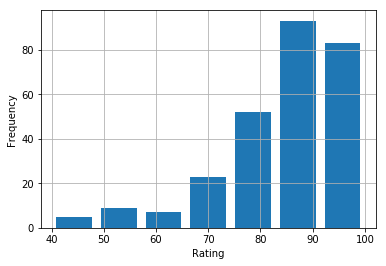

In [34]:
###histogram for Rating bin size = 7
whiskeydf.Rating.hist(bins=7, rwidth=0.8);
plt.xlabel('Rating');
plt.ylabel('Frequency');

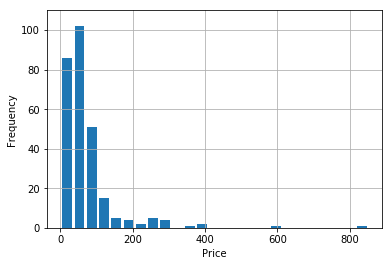

In [35]:
###histogram for Rating bin size = 25
whiskeydf.Price.hist(bins=25, rwidth=0.8);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.ylim([0,110]);

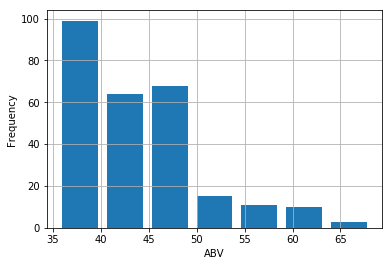

In [36]:
###histogram for ABV bin size = 7
whiskeydf.ABV.hist(bins=7, rwidth=0.8);
plt.xlabel('ABV');
plt.ylabel('Frequency');

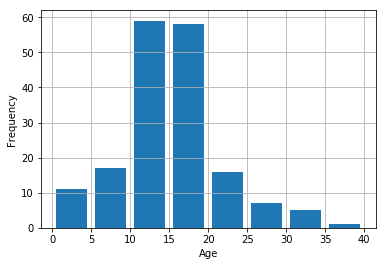

In [37]:
###histogram for Age bin size = 8
whiskeydf.Age.hist(bins=8, rwidth=0.8);
plt.xlabel('Age');
plt.ylabel('Frequency');

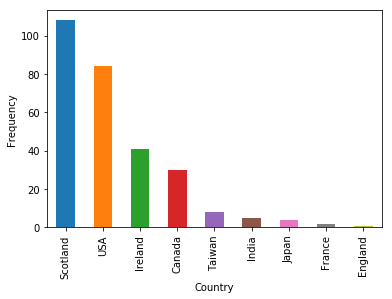

In [38]:
###histogram for Country 
whiskeydf['Country'].value_counts().plot.bar();
plt.xlabel('Country');
plt.ylabel('Frequency');

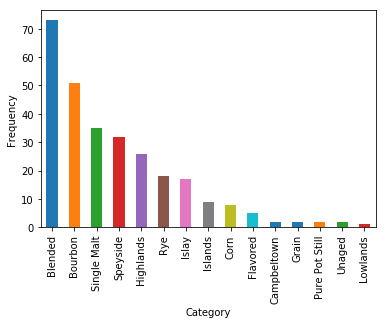

In [39]:
###histogram for Category
whiskeydf['Category'].value_counts().plot.bar();
plt.xlabel('Category');
plt.ylabel('Frequency');